In [98]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

from itertools import product
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBRegressor
from xgboost import plot_importance

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

import time
import sys
import gc
import pickle
sys.version_info

sys.version_info(major=3, minor=6, micro=5, releaselevel='final', serial=0)

In [99]:
df = pd.read_csv('allorders.csv')

In [100]:
df.head()

,kitchen,source,brand,orderSeq,itemName,itemtotal,date(ao.createdAt),dayofweek(ao.createdAt)
0,HSR,UberEats,WarmOven,195310,Chocolate truffle pastry single,98,2019-05-12,1
1,Panathur,UberEats,WarmOven,220365,Choco Lava 1 Pcs,592,2019-05-29,4
2,Panathur,UberEats,WarmOven,220397,Assorted Cupcakes (Box of 6),200,2019-05-29,4
3,Domlur,UberEats,IndianaBurgers,220421,Extra Egg,50,2019-05-29,4
4,Domlur,UberEats,IndianaBurgers,220421,Lamb Burger,278,2019-05-29,4


In [51]:
df.rename(columns={'date(ao.createdAt)': 'date', 'dayofweek(ao.createdAt)': 'dayofweek', 'itemtotal': 'sales'}, inplace=True)
df.head()

,kitchen,source,brand,orderSeq,itemName,sales,date,dayofweek
0,HSR,UberEats,WarmOven,195310,Chocolate truffle pastry single,98,2019-05-12,1
1,Panathur,UberEats,WarmOven,220365,Choco Lava 1 Pcs,592,2019-05-29,4
2,Panathur,UberEats,WarmOven,220397,Assorted Cupcakes (Box of 6),200,2019-05-29,4
3,Domlur,UberEats,IndianaBurgers,220421,Extra Egg,50,2019-05-29,4
4,Domlur,UberEats,IndianaBurgers,220421,Lamb Burger,278,2019-05-29,4


In [52]:
df['date'] = pd.to_datetime(df['date'].str.strip(), format='%Y/%m/%d')
df.head()

,kitchen,source,brand,orderSeq,itemName,sales,date,dayofweek
0,HSR,UberEats,WarmOven,195310,Chocolate truffle pastry single,98,2019-05-12,1
1,Panathur,UberEats,WarmOven,220365,Choco Lava 1 Pcs,592,2019-05-29,4
2,Panathur,UberEats,WarmOven,220397,Assorted Cupcakes (Box of 6),200,2019-05-29,4
3,Domlur,UberEats,IndianaBurgers,220421,Extra Egg,50,2019-05-29,4
4,Domlur,UberEats,IndianaBurgers,220421,Lamb Burger,278,2019-05-29,4


In [53]:
df['Year'] = pd.DatetimeIndex(df['date']).year
df['Month'] = pd.DatetimeIndex(df['date']).month
df['Day'] = pd.DatetimeIndex(df['date']).day
df['Week'] = pd.DatetimeIndex(df['date']).week

In [54]:
df.head()

,kitchen,source,brand,orderSeq,itemName,sales,date,dayofweek,Year,Month,Day,Week
0,HSR,UberEats,WarmOven,195310,Chocolate truffle pastry single,98,2019-05-12,1,2019,5,12,19
1,Panathur,UberEats,WarmOven,220365,Choco Lava 1 Pcs,592,2019-05-29,4,2019,5,29,22
2,Panathur,UberEats,WarmOven,220397,Assorted Cupcakes (Box of 6),200,2019-05-29,4,2019,5,29,22
3,Domlur,UberEats,IndianaBurgers,220421,Extra Egg,50,2019-05-29,4,2019,5,29,22
4,Domlur,UberEats,IndianaBurgers,220421,Lamb Burger,278,2019-05-29,4,2019,5,29,22


In [55]:
df.groupby('source')['itemtotal'].describe()

KeyError: 'Column not found: itemtotal'

In [56]:
df = df.replace(to_replace =["Admin"],  value ="Dunzo") 
df = df.replace(to_replace =["Foodpanda"],  value ="FoodPanda") 

In [57]:
df.groupby('source')['itemtotal'].describe()

KeyError: 'Column not found: itemtotal'

In [ ]:
df.head()

In [58]:
df.groupby('kitchen')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
kitchen,,,,,,,,
Sarjapur,593.0,822.831366,9804.600191,80.0,265.0,265.0,425.00,238500.0
BTM,32519.0,144.695286,429.682795,0.0,39.0,89.0,156.00,28800.0
Brookfield,26416.0,134.816853,291.030258,0.0,39.0,79.0,129.00,21609.0
Domlur,42423.0,188.574099,936.995302,0.0,39.0,89.0,169.00,121856.0
HSR,22231.0,163.757411,365.764143,0.0,49.0,89.0,169.00,24900.0
Hebbal,37607.0,182.695615,613.486568,0.0,49.0,99.0,179.00,60025.0
Hoodi,13571.0,202.411097,893.341323,0.0,49.0,99.0,196.00,51600.0
Kadubeesanahalli,639.0,402.646322,586.974176,90.0,265.0,309.0,425.00,9800.0
Kaggadasapura,281.0,449.893238,999.468039,90.0,265.0,265.0,425.00,14112.0


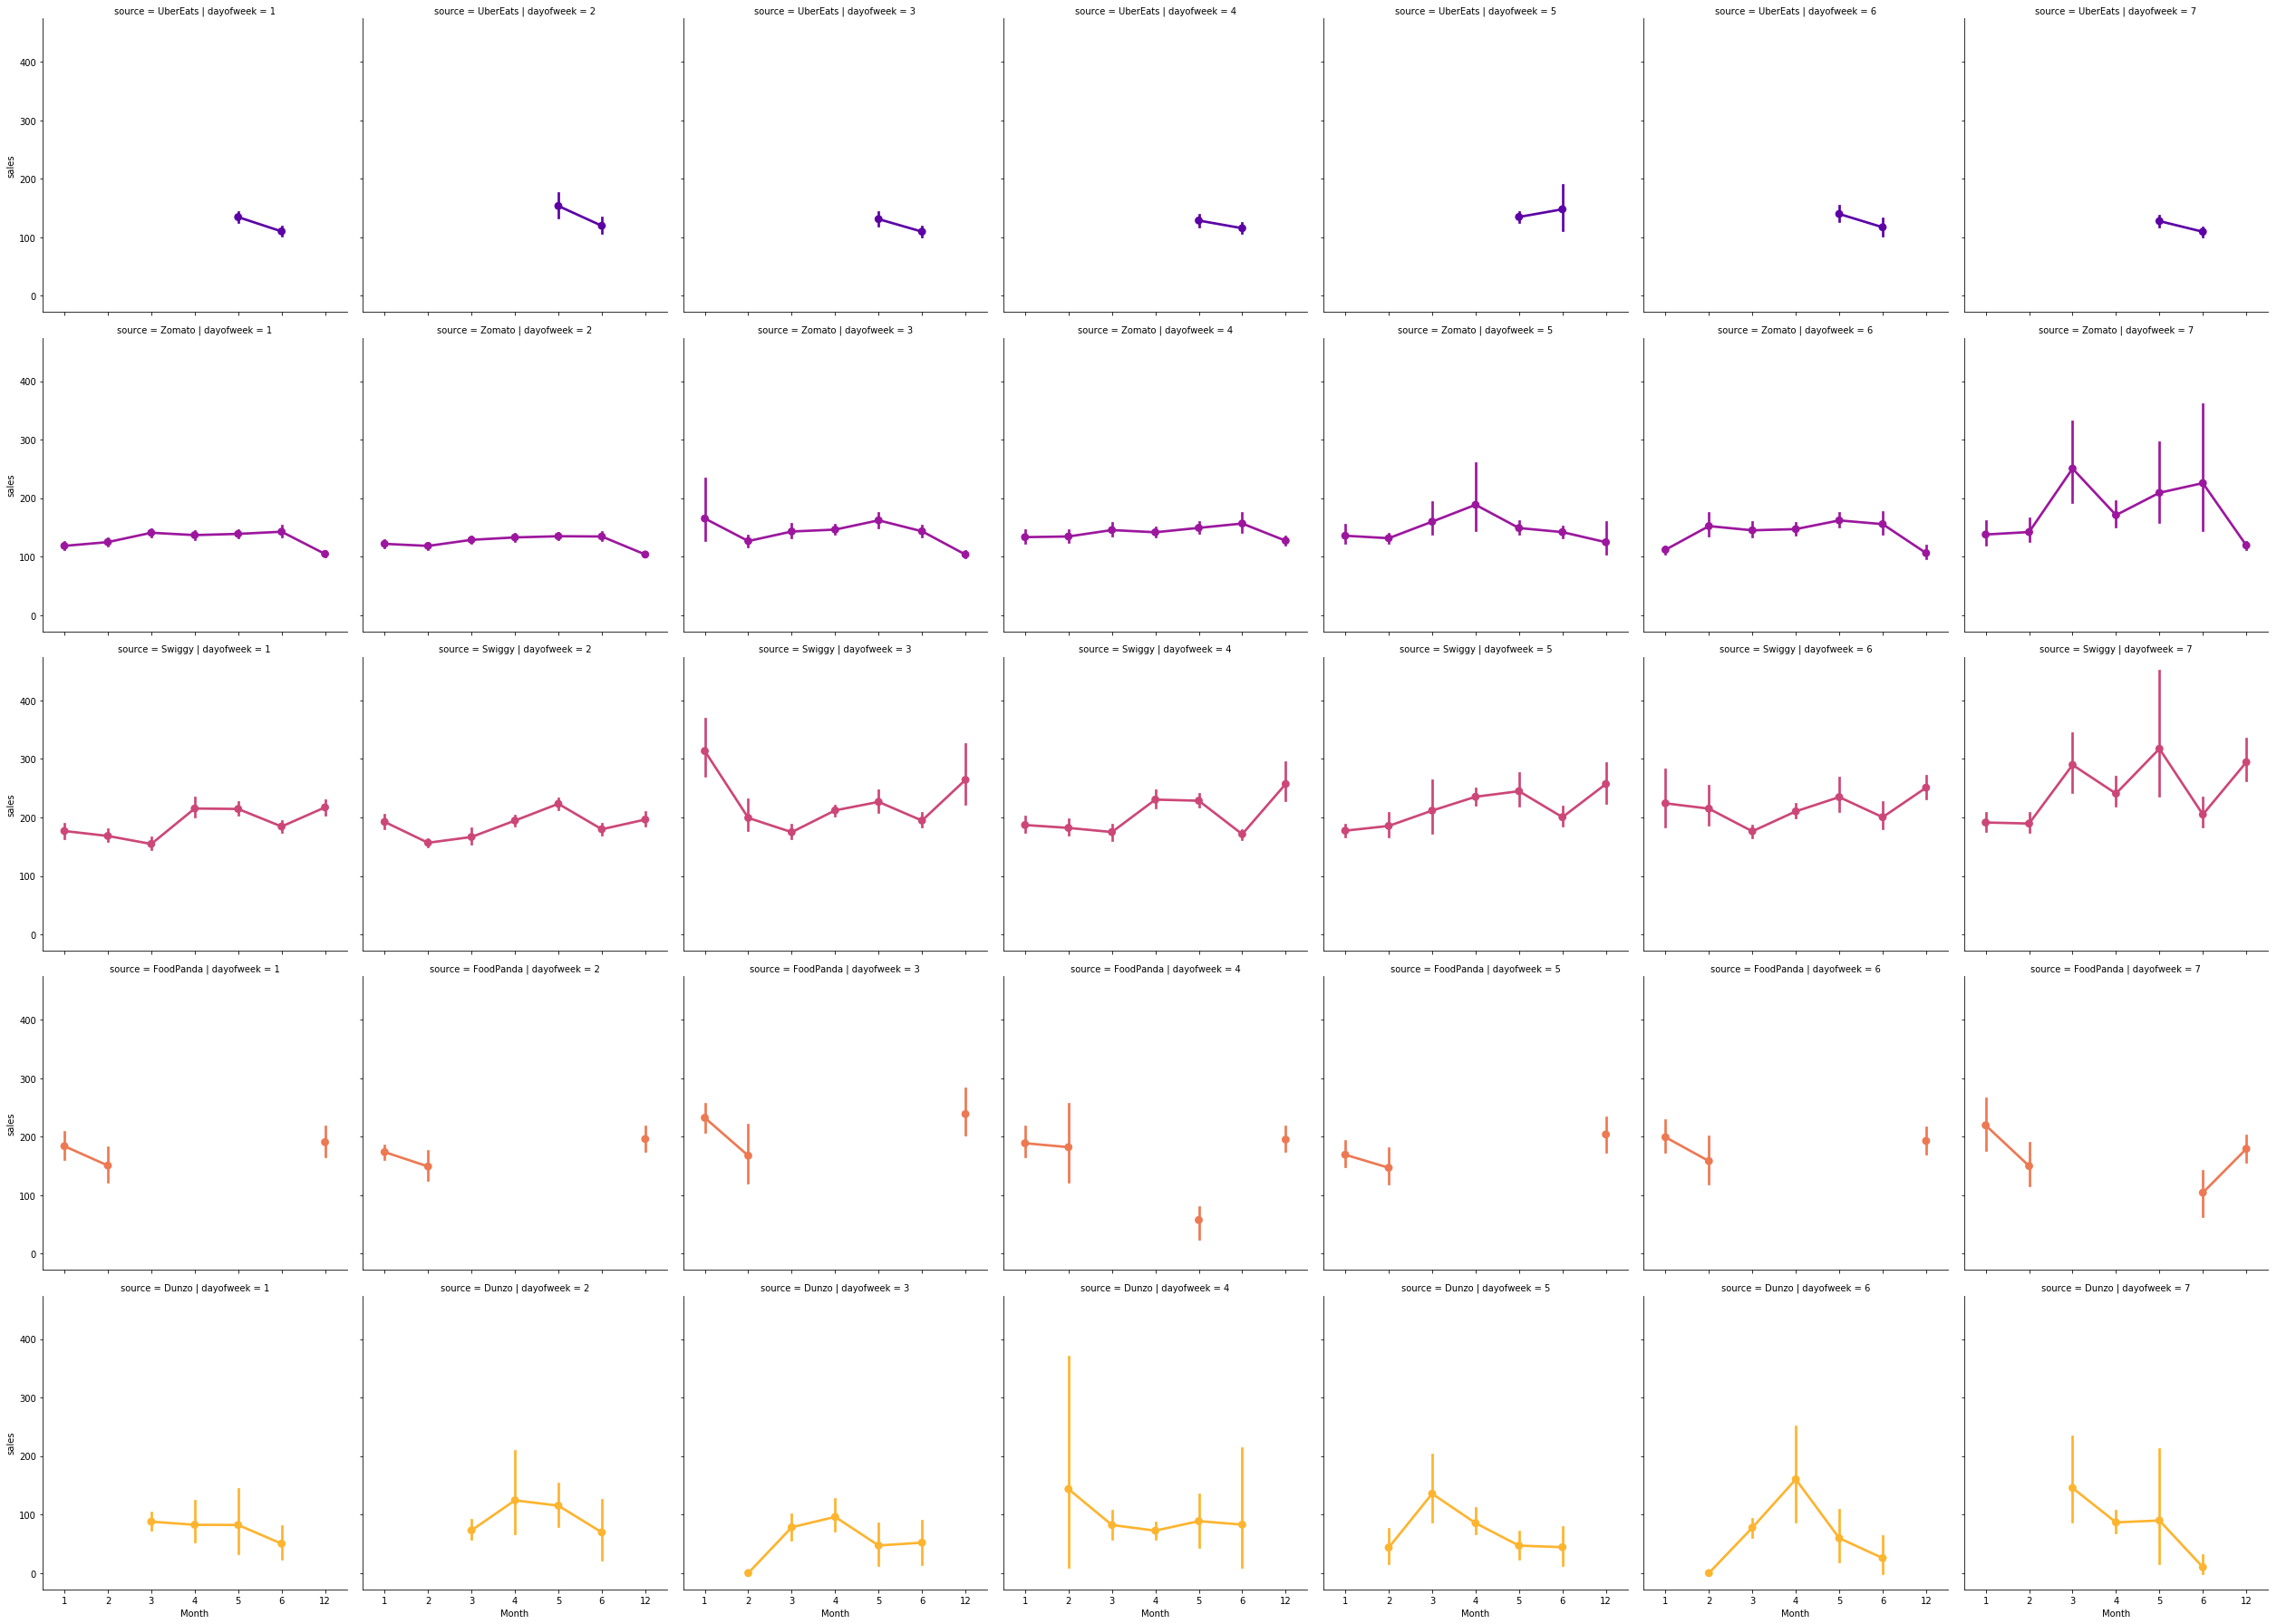

In [59]:
c = '#386B7F'
sns.factorplot(data = df, x = 'Month', y = "sales", 
               col = 'dayofweek', # per store type in cols
               palette = 'plasma',
               hue = 'source',
               row = 'source', # per store type in rows
               color = c) 

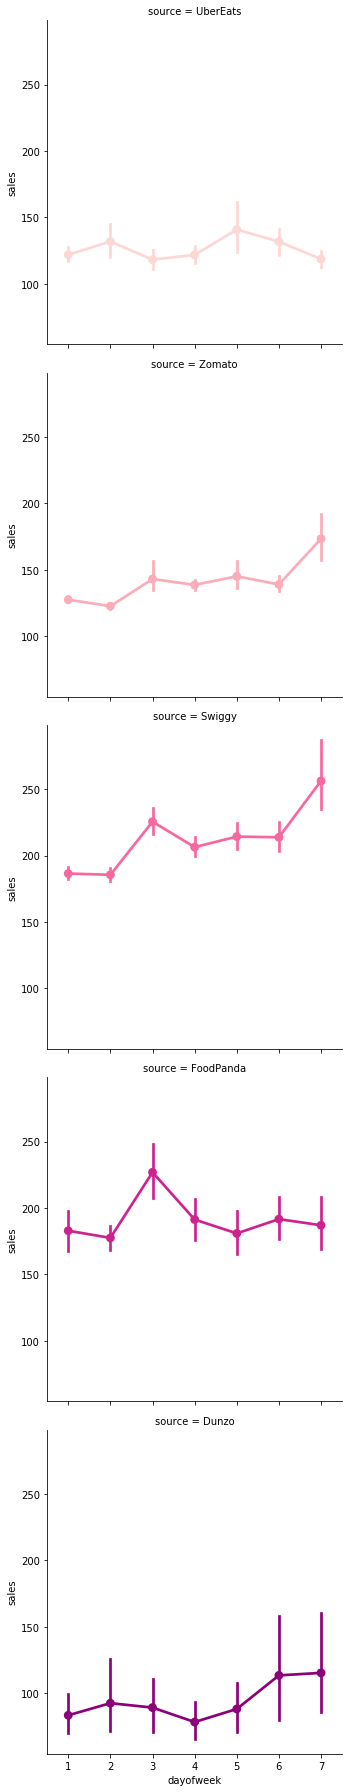

In [62]:
# sale  trends
sns.factorplot(data = df, x = 'dayofweek', y = "sales", 
               row = 'source',
               hue = 'source',
               palette = 'RdPu') 

In [64]:
# from the prophet documentation every variables should have specific names
df = df.rename(columns = {'date': 'ds',
                                'sales': 'y'})
df.head()

,kitchen,source,brand,orderSeq,itemName,y,ds,dayofweek,Year,Month,Day,Week
0,HSR,UberEats,WarmOven,195310,Chocolate truffle pastry single,98,2019-05-12,1,2019,5,12,19
1,Panathur,UberEats,WarmOven,220365,Choco Lava 1 Pcs,592,2019-05-29,4,2019,5,29,22
2,Panathur,UberEats,WarmOven,220397,Assorted Cupcakes (Box of 6),200,2019-05-29,4,2019,5,29,22
3,Domlur,UberEats,IndianaBurgers,220421,Extra Egg,50,2019-05-29,4,2019,5,29,22
4,Domlur,UberEats,IndianaBurgers,220421,Lamb Burger,278,2019-05-29,4,2019,5,29,22


In [75]:
sales = df.loc[:, ['ds', 'y']]

In [76]:
sales = sales.groupby('ds')['y'].sum().reset_index()
print (sales)

            ds        y
0   2018-12-05   642563
1   2018-12-06   151739
2   2018-12-07   192040
3   2018-12-08   247667
4   2018-12-09   240924
5   2018-12-10   311503
6   2018-12-11   213136
7   2018-12-12   322787
8   2018-12-13   300656
9   2018-12-14   330189
10  2018-12-15   362513
11  2018-12-16   362451
12  2018-12-17   395264
13  2018-12-18   242490
14  2018-12-19   310054
15  2018-12-20   394861
16  2018-12-21   391497
17  2018-12-22   454244
18  2018-12-23   295820
19  2018-12-24   299156
20  2018-12-25   418466
21  2018-12-26   652876
22  2018-12-27   313908
23  2018-12-28   270465
24  2018-12-29   283753
25  2018-12-30   412398
26  2018-12-31   311729
27  2019-01-01  1081048
28  2019-01-02   354981
29  2019-01-03    53399
30  2019-01-07  1196877
31  2019-01-08   210600
32  2019-01-09   234553
33  2019-01-10   230785
34  2019-01-11   203578
35  2019-01-12   217256
36  2019-01-13   269366
37  2019-01-14   254305
38  2019-01-15   236793
39  2019-01-16   218316
40  2019-01-17  

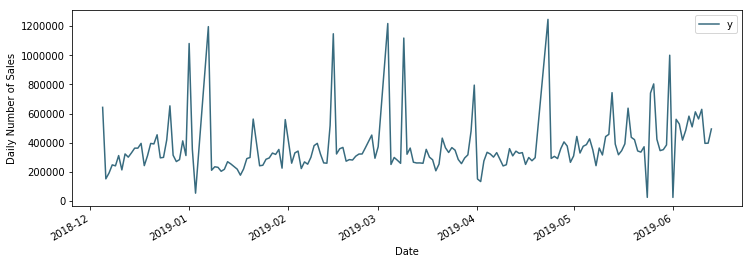

In [77]:
# plot daily sales
ax = sales.set_index('ds').plot(figsize = (12, 4), color = c)
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

In [78]:
df.head()


,kitchen,source,brand,orderSeq,itemName,y,ds,dayofweek,Year,Month,Day,Week
0,HSR,UberEats,WarmOven,195310,Chocolate truffle pastry single,98,2019-05-12,1,2019,5,12,19
1,Panathur,UberEats,WarmOven,220365,Choco Lava 1 Pcs,592,2019-05-29,4,2019,5,29,22
2,Panathur,UberEats,WarmOven,220397,Assorted Cupcakes (Box of 6),200,2019-05-29,4,2019,5,29,22
3,Domlur,UberEats,IndianaBurgers,220421,Extra Egg,50,2019-05-29,4,2019,5,29,22
4,Domlur,UberEats,IndianaBurgers,220421,Lamb Burger,278,2019-05-29,4,2019,5,29,22


In [79]:
sales = df.loc[:, ['dayofweek', 'y']]

In [80]:
sales = sales.groupby('dayofweek')['y'].sum().reset_index()
print (sales)

   dayofweek         y
0          1   9669061
1          2  11575527
2          3   8899278
3          4   9084370
4          5   9295974
5          6   9008459
6          7   9552464


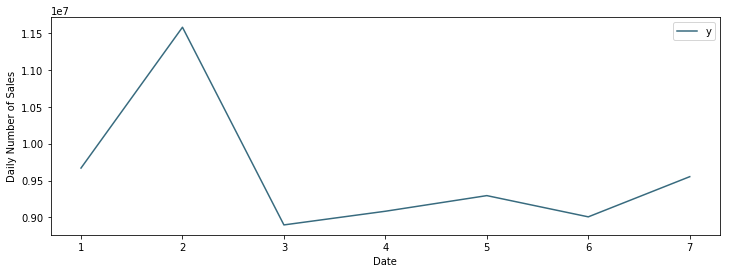

In [81]:
# plot day of week sales
ax = sales.set_index('dayofweek').plot(figsize = (12, 4), color = c)
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

In [86]:
!pip3 install fbprophet

    100% |████████████████████████████████| 51kB 182kB/s ta 0:00:01
    100% |████████████████████████████████| 2.9MB 2.0MB/s ta 0:00:01
    100% |████████████████████████████████| 37.4MB 876kB/s ta 0:00:011    85% |███████████████████████████▌    | 32.1MB 2.3MB/s eta 0:00:03
    100% |████████████████████████████████| 81kB 362kB/s ta 0:00:01
    100% |████████████████████████████████| 747kB 411kB/s ta 0:00:01
  Running setup.py bdist_wheel for fbprophet ... error
  Complete output from command /usr/local/opt/python/bin/python3.6 -u -c "import setuptools, tokenize;__file__='/private/var/folders/56/djs9bfjx4sgfn3mfm4bb8zy00000gn/T/pip-install-u4v3uycg/fbprophet/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /private/var/folders/56/djs9bfjx4sgfn3mfm4bb8zy00000gn/T/pip-wheel-ag0x_5yn --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creati

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [87]:
# prophet by Facebook
from fbprophet import Prophet

In [89]:
sales = df.rename(columns = {'date': 'ds',
                                'sales': 'y'})
sales.head()

,kitchen,source,brand,orderSeq,itemName,y,ds,dayofweek,Year,Month,Day,Week
0,HSR,UberEats,WarmOven,195310,Chocolate truffle pastry single,98,2019-05-12,1,2019,5,12,19
1,Panathur,UberEats,WarmOven,220365,Choco Lava 1 Pcs,592,2019-05-29,4,2019,5,29,22
2,Panathur,UberEats,WarmOven,220397,Assorted Cupcakes (Box of 6),200,2019-05-29,4,2019,5,29,22
3,Domlur,UberEats,IndianaBurgers,220421,Extra Egg,50,2019-05-29,4,2019,5,29,22
4,Domlur,UberEats,IndianaBurgers,220421,Lamb Burger,278,2019-05-29,4,2019,5,29,22


In [90]:
sales = sales.groupby('ds')['y'].sum().reset_index()
print (sales)

            ds        y
0   2018-12-05   642563
1   2018-12-06   151739
2   2018-12-07   192040
3   2018-12-08   247667
4   2018-12-09   240924
5   2018-12-10   311503
6   2018-12-11   213136
7   2018-12-12   322787
8   2018-12-13   300656
9   2018-12-14   330189
10  2018-12-15   362513
11  2018-12-16   362451
12  2018-12-17   395264
13  2018-12-18   242490
14  2018-12-19   310054
15  2018-12-20   394861
16  2018-12-21   391497
17  2018-12-22   454244
18  2018-12-23   295820
19  2018-12-24   299156
20  2018-12-25   418466
21  2018-12-26   652876
22  2018-12-27   313908
23  2018-12-28   270465
24  2018-12-29   283753
25  2018-12-30   412398
26  2018-12-31   311729
27  2019-01-01  1081048
28  2019-01-02   354981
29  2019-01-03    53399
30  2019-01-07  1196877
31  2019-01-08   210600
32  2019-01-09   234553
33  2019-01-10   230785
34  2019-01-11   203578
35  2019-01-12   217256
36  2019-01-13   269366
37  2019-01-14   254305
38  2019-01-15   236793
39  2019-01-16   218316
40  2019-01-17  

In [93]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width = 0.95)
my_model.fit(sales)

# dataframe that extends into future 6 weeks 
future_dates = my_model.make_future_dataframe(periods = 6*7)

print("First week to forecast.")
future_dates.tail(45)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


First week to forecast.


,ds
177,2019-06-11
178,2019-06-12
179,2019-06-13
180,2019-06-14
181,2019-06-15
182,2019-06-16
183,2019-06-17
184,2019-06-18
185,2019-06-19
186,2019-06-20


In [94]:
# predictions
forecast = my_model.predict(future_dates)

# preditions for last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
215,2019-07-19,436856.726982,56293.847693,793813.368625
216,2019-07-20,476313.828019,135870.029329,835414.266131
217,2019-07-21,481216.297764,142107.631347,851630.529502
218,2019-07-22,525141.644137,155303.140176,871324.265514
219,2019-07-23,433473.560917,42519.917672,784419.088421
220,2019-07-24,404936.498252,29965.758080,746889.628117
221,2019-07-25,412577.269949,46065.062252,780022.725575


In [95]:
fc = forecast[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

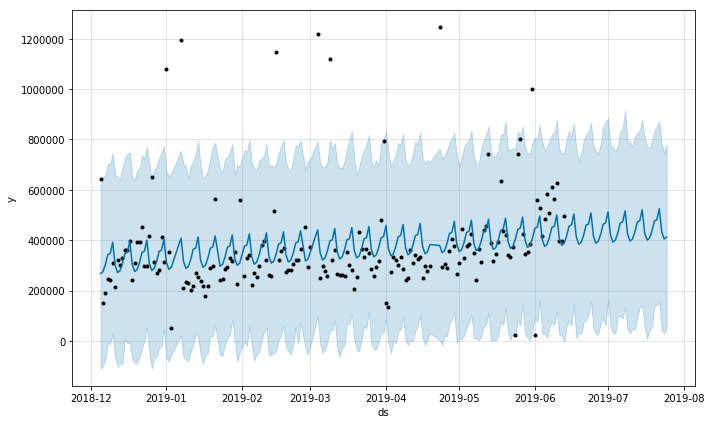

In [96]:
my_model.plot(forecast);

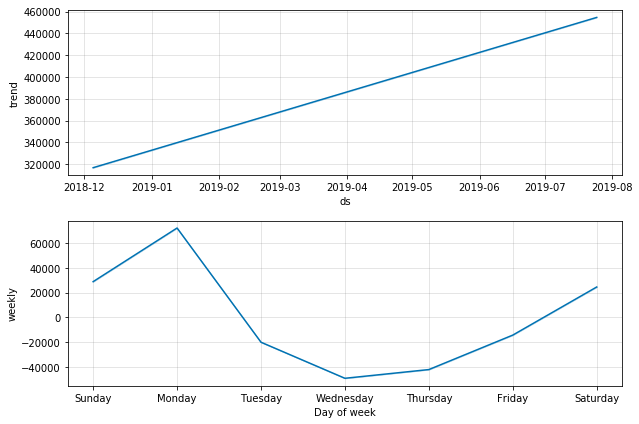

In [97]:
my_model.plot_components(forecast);